In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam


# Define the polynominal function

In [7]:
def polynomial(x):
    return 5 * x**3 - 8 * x**2 - 7 * x + 1

In [52]:
import numpy as np
X_train = np.linspace(-20, 20, 1000)
y_train = polynomial(X_train)

# Normalize the values

In [53]:
x_train= 2 * (X_train - X_train.min()) / (X_train.max() - X_train.min()) - 1
y_train = 2 * (y_train - y_train.min()) / (y_train.max() - y_train.min()) - 1


In [54]:
print(min(x_train))
print(max(x_train))
print(min(y_train))
print(max(y_train))

-1.0
1.0
-1.0
1.0


# Splittig for training and Testing 

In [56]:
x_train_data=x_train[:int(len(x_train)*0.90)]
y_train_data=y_train[:int(len(x_train)*.90)]

x_val=x_train[int(len(x_train)*0.90):int(len(x_train)*0.95)]
y_val=y_train[int(len(x_train)*0.90):int(len(x_train)*0.95)]

x_test=x_train[int(len(x_train)*0.95):]
y_test=y_train[int(len(x_train)*0.95):]

# Creating the model

In [57]:
inputs = Input(shape=(1))
x = Dense(32,activation='relu')(inputs)
x =Dense(64,activation='relu')(x)
x = Dense(128,activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs,outputs=outputs)
model.summary()
adam = Adam(learning_rate=0.0001)
model.compile(loss=['mse'], optimizer=adam, metrics=tf.keras.metrics.R2Score(name="accuracy"))
model1 = model.fit(x_train_data, y_train_data, epochs=40,validation_data = (x_val, y_val))

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_61 (Dense)            (None, 32)                64        
                                                                 
 dense_62 (Dense)            (None, 64)                2112      
                                                                 
 dense_63 (Dense)            (None, 128)               8320      
                                                                 
 dense_64 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
29/29 [====

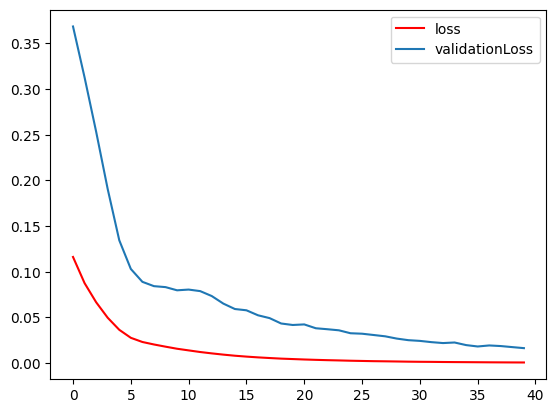

In [58]:
import matplotlib.pyplot as plt
plt.plot(model1.history['loss'],color='red',label='loss')
plt.plot(model1.history['val_loss'],label='validationLoss')
plt.legend()

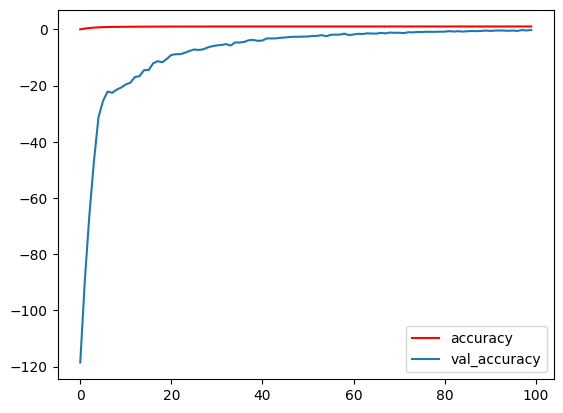

In [38]:
plt.plot(model1.history['accuracy'],color='red', label='accuracy')
plt.plot(model1.history['val_accuracy'] , label='val_accuracy')
plt.legend()

2/2 [==============================] - 0s 3ms/step


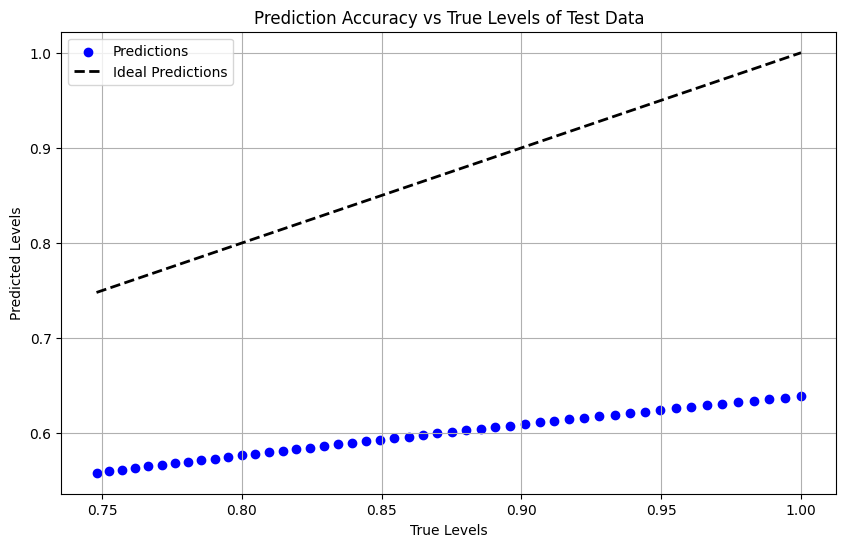

In [61]:
y_pred = model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Predictions')
plt.title('Prediction Accuracy vs True Levels of Test Data')
plt.xlabel('True Levels')
plt.ylabel('Predicted Levels')
plt.legend()
plt.grid(True)
plt.show()